In [23]:
import numpy as np
import nn

# CNNs on MNIST
In this exercise we will apply CNNs to a mini version of CIFAR-10.

First, take a look at the convolution neural network code I placed into the nn package now. There are two different convolution and pooling implementations, one implementing a scan over the input using for-loops in cython (see nn/conv/conv_classic.pyx and pool_classic.pyx) which is most likely similar to what you implemented.

The second one is implemented using an im2col function which first extracts all small sub-patches from the image which we would encounter during a convolution and then applies one big matrix matrix multiplication (similar to a fully connected layer). On my machine the latter is faster and therefore we will use it as a default.

Your task for this exercise is to load the mini cifar-10 dataset and train a convnet on it. So let us start by getting the data.

In [24]:
# you can load the mnist data as 
data = nn.data.minicifar10()

... loading data
... done loading data


The next step would be to define a network and start training. 

However before we do that let us have a look at the data.

In [25]:
train_data, valid_data, test_data = data

In [26]:
train_x, train_y = train_data 

In [27]:
print(train_x.shape)
print(np.max(train_x))

(5000, 3, 32, 32)
255.0


What we can see above is that the data is not yet normalized (it contains pixel values between 0 and 255) so you might want to do that.
What we can also see is that the data has 3 channels and consists of 32 x 32 images.
We can look at an image as follows (pyplot expects the rgb channels to be the trailing dimension, thus we have to transpose).

In [28]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


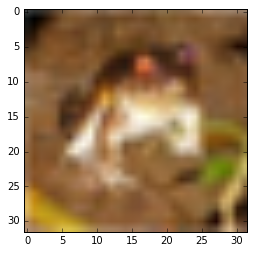

In [29]:
example = train_x[0].transpose(1,2,0) / 255.
pyplot.imshow(example)

The next thing to observe is that you are "only" given 5000 training examples which makes training fast (yay) but will quickly result in overfitting!

It might thus be a good idea to enrich your dataset by including augmented versions. You can create such versions by transforming the images in such a way that you would expect your classifier to still classify them correctly. For example: you might shift the image a few pixels, zoom a bit, or even flip the image.
For a list of inspirational examples ;) have a look at this paper:
* http://research.microsoft.com/pubs/68920/icdar03.pdf

Or this one:
* http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf

Now you should be ready to get going! Good luck !